<a href="https://colab.research.google.com/github/MxMathe/Reconhecimento-de-face/blob/main/Reconhecimento_de_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib-venn
!pip install mtcnn
!pip install keras_facenet
!pip install lz4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=09036b8a4cd9a6bff865d7e6117c5b6262201466bd834b848a05b00c5734d145
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras_facenet


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from tensorflow.keras.models import load_model
from mtcnn import MTCNN
from keras_facenet import FaceNet
import kagglehub
import zipfile

Configuração inicial

In [ ]:
detector = MTCNN()
embedder = FaceNet()

Função para detectar faces

In [ ]:
def detect_faces(image):
    faces = detector.detect_faces(image)
    face_images = []
    for face in faces:
        x, y, w, h = face['box']
        face_crop = image[y:y+h, x:x+w]
        face_images.append(face_crop)
    return face_images, faces

Função para extrair embeddings

In [ ]:
def get_embeddings(face_images):
    embeddings = []
    for face in face_images:
        face = cv2.resize(face, (160, 160))
        face = np.expand_dims(face, axis=0)
        embeddings.append(embedder.embeddings(face)[0])
    return np.array(embeddings)

Extrair o arquivo ZIP

In [ ]:
zip_path = "/content/archive.zip"
extract_path = "/content/lfw"  # Pasta onde os arquivos serão extraídos

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extraído para: {extract_path}")

Dataset extraído para: /content/lfw


Carregamento do dataset LFW

In [ ]:
DATASET_PATH = '/content/lfw/lfw-deepfunneled/lfw-deepfunneled'  # Ajuste conforme necessário
X, y = [], []

for person in os.listdir(DATASET_PATH):
    person_path = os.path.join(DATASET_PATH, person)
    if os.path.isdir(person_path):
        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            faces, _ = detect_faces(image)
            if faces:
                embedding = get_embeddings(faces)[0]
                X.append(embedding)
                y.append(person)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/ste

In [17]:
# Conversão para arrays
X = np.array(X)
y = np.array(y)

# Encode das labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Divisão dos dados
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Treinamento do classificador SVM
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

Teste do modelo

In [18]:
def recognize_face(image):
    faces, face_positions = detect_faces(image)
    if not faces:
        return image
    embeddings = get_embeddings(faces)
    predictions = clf.predict(embeddings)
    for i, face in enumerate(face_positions):
        x, y, w, h = face['box']
        label = label_encoder.inverse_transform([predictions[i]])[0]
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

Teste com uma imagem

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


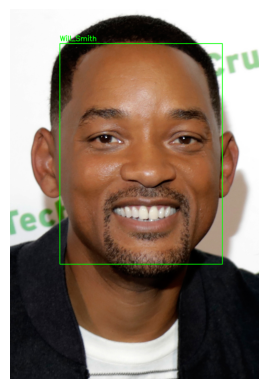

In [21]:
image_path = '/content/imagetest.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
recognized_image = recognize_face(image)

plt.imshow(recognized_image)
plt.axis('off')
plt.show()